## The aim of this project is to investigate the effect of varying parameters on the accuracy of a K-Nearest neighbors prediction. We vary the number and quality of features as well as the hyperparameter(number of nearest neighbors) independently. Then we vary them in combination and make plots of our findings. Finally, we repeat the analysis with a k-fold cross validation algorithm

In this project, we will predict a car's market price using its attributes. The data set we will be working with contains information on various cars. For each car we have information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and can download it directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

Let's start by reading in the dataset.

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline
pd.options.display.max_columns = 99
style.use("fivethirtyeight")

In [2]:
cars = pd.read_csv('imports-85.data', header=None)

In [3]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 
        'num-of-doors', 'body-style','drive-wheels', 'engine-location', 
        'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
        'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 
        'highway-mpg', 'price']
cars.columns = cols

In [4]:
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


## Next we keep only the numeric columns relevant for our learning process

In [5]:
relevant_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = cars[relevant_cols]

## Then we clean the data and replace missing values or drop rows. Whenever we replace missing values, we simply assign the mean value of the column

In [6]:
cars = cars.replace("?",np.nan)

In [7]:
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,13495
1,NaN,88.6,168.8,64.1,48.8,2548,3.47,2.68,9.0,111,5000,21,27,16500
2,NaN,94.5,171.2,65.5,52.4,2823,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,3.19,3.40,8.0,115,5500,18,22,17450


In [8]:
cars = cars.astype(float)
cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [9]:
cars = cars.dropna(subset=["price"])
cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [10]:
cars = cars.apply(lambda x: x.fillna(x.mean()),axis=0)

In [11]:
cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Next let us look at the distribution of values across all columns

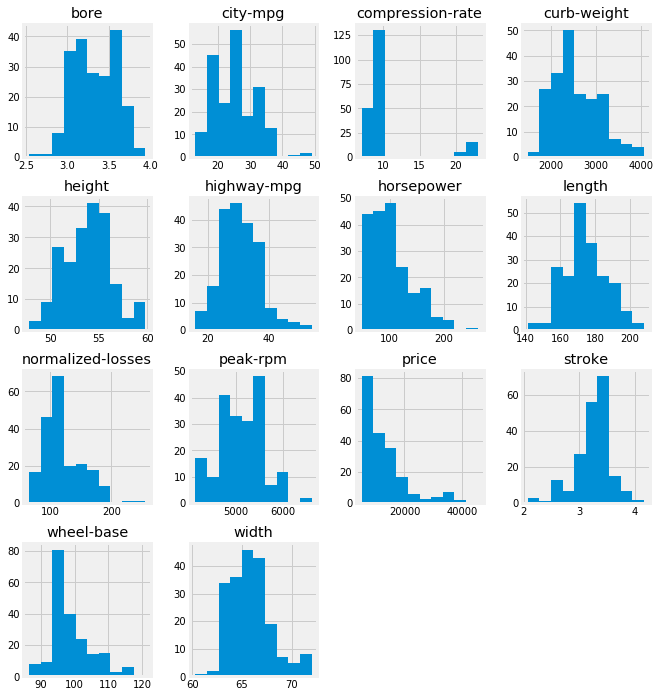

In [12]:
cars.hist(figsize=(10,12));

## Next we normalize the columns so that they range between 0 and 1. This ensures that we are able to compare values across columns

In [13]:
## We exclude the price column since we are performing our predictions on it
cars[cars.columns[:-1]] = cars[cars.columns[:-1]].apply(
lambda x: (x-x.min())/(x.max()-x.min()),axis="index")

In [14]:
cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## We define our first training function. It uses a single column as its feature and the dataset is split evenly into test and train. To ensure that our training isn't biased toward the order of the data, we randomize the rows. The default 5 nearest neighbors is used

In [15]:
def knn_train_test(train_column,target_column,df):
    np.random.seed(1)
        
    #We shuffle the dataframe
    new_df = df.iloc[np.random.permutation(len(df))]
    
    # Split dataframe into training and testing set
    train_set = new_df.iloc[0:int(len(new_df) * .5)]
    test_set = new_df.iloc[int(len(new_df) *.5):]
    
    
    knn = KNeighborsRegressor()
    knn.fit(train_set[[train_column]],train_set[[target_column]])
    prediction = knn.predict(test_set[[train_column]])
    mse = mean_squared_error(test_set[[target_column]],prediction)
    rmse = np.sqrt(mse)
    return rmse

## We apply the function to all feature columns

In [16]:
rmse_values = dict()
for column in cars.columns[:-1]:
    rmse_values[column] = knn_train_test(column,"price",cars)
rmse_values_series = pd.Series(rmse_values).sort_values()

In [17]:
rmse_values_series

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

## The table above shows the features ranked in order of lowest to highest RMSE values

## Next we observe the effects of varying the nearest neighbor parameter

In [18]:
all_rmse_dict = dict()
def knn_train_test_modify(train_column,target_column,df):
    np.random.seed(1)
        
    #We shuffle the dataframe
    new_df = df.iloc[np.random.permutation(len(df))]
    
    # Split dataframe into training and testing set
    train_set = new_df.iloc[0:int(len(new_df) * .5)]
    test_set = new_df.iloc[int(len(new_df) *.5):]
    
    # We vary the number of neighbors
    k_list = [1,3,5,7,9]
    rmse_dict = dict()
    for k in k_list:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[[train_column]],train_set[[target_column]])
        prediction = knn.predict(test_set[[train_column]])
        mse = mean_squared_error(test_set[[target_column]],prediction)
        rmse = np.sqrt(mse)
        rmse_dict[k] = rmse
    return rmse_dict

In [19]:
for column in cars.columns[:-1]:
    all_rmse_dict[column] = knn_train_test_modify(column,"price",cars)
all_rmse_dict

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,
  5: 6780.627784685976,
  7: 6878.097965921532,
  9: 6866.808502038413},
 'stroke': {1: 9116.495955406906,
  3: 7338.68466990294,
  5: 8006

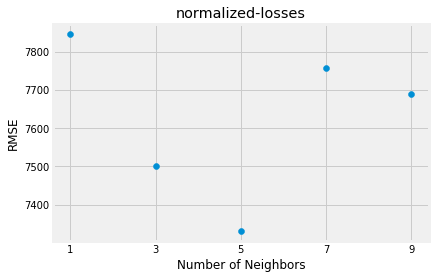

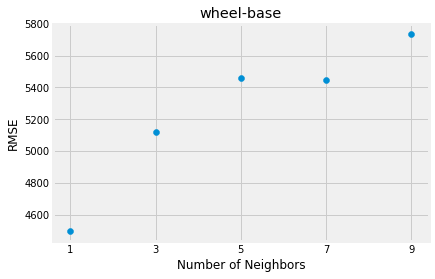

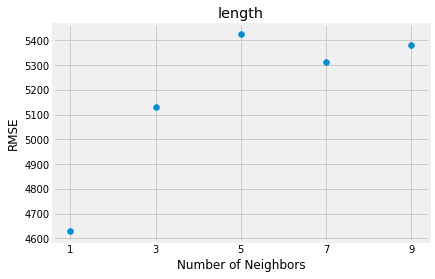

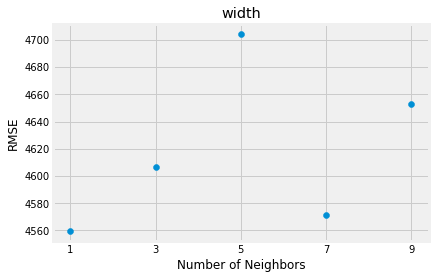

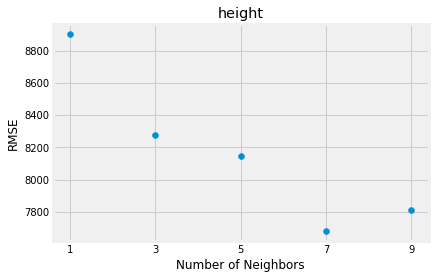

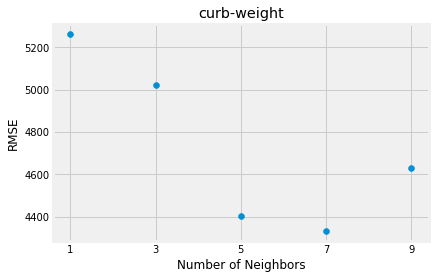

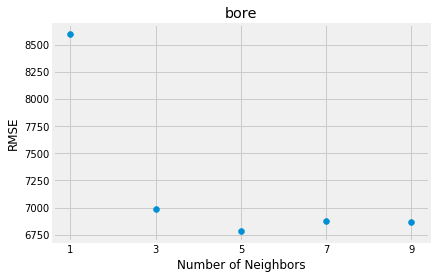

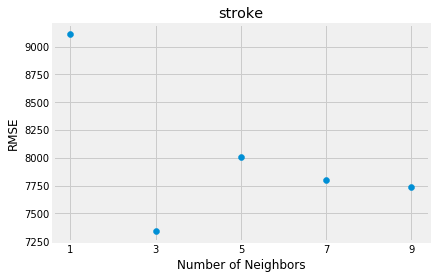

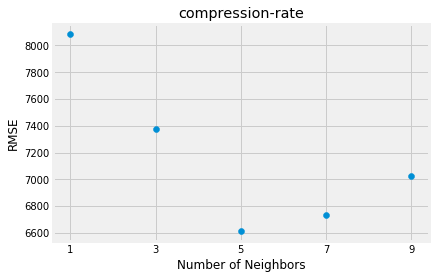

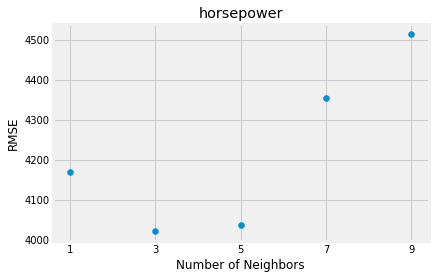

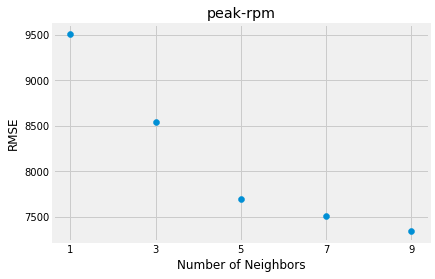

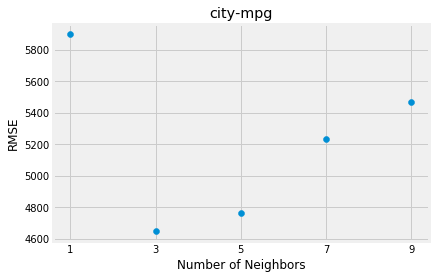

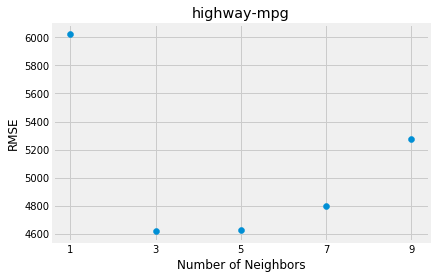

In [20]:
fig,ax = plt.subplots()
i = 1
for k,v in all_rmse_dict.items():
    x = list(v.keys())
    y = list(v.values())
    #ax = fig.add_subplot(13,1,i)
    plt.scatter(x,y)
    plt.title(k)
    plt.xticks(x)
    plt.xlabel("Number of Neighbors")
    plt.ylabel("RMSE")
    i += 1
    plt.show()

## We compute the average of the rmse values for each feature

In [21]:
new_dict = dict()
for k,v in all_rmse_dict.items():
    avg_rmse = np.mean(list(v.values()))
    new_dict[k] = avg_rmse
new_dict_series = pd.Series(new_dict).sort_values()
print(new_dict_series)
all_features = new_dict_series.index
all_features

horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


Index(['horsepower', 'width', 'curb-weight', 'highway-mpg', 'length',
       'city-mpg', 'wheel-base', 'compression-rate', 'bore',
       'normalized-losses', 'stroke', 'peak-rpm', 'height'],
      dtype='object')

## Based on the results above, we select the best features at at time. We take the best n-features for n in [2,5] and observe their effects on the root mean squared error. The nearest neighbor parameter is fixed to 5

In [22]:
def knn_train_test_multi_columns(train_columns,target_column,df):
    np.random.seed(1)
        
    #We shuffle the dataframe
    new_df = df.iloc[np.random.permutation(len(df))]
    
    # Split dataframe into training and testing set
    train_set = new_df.iloc[0:int(len(new_df) * .5)]
    test_set = new_df.iloc[int(len(new_df) *.5):]
    
    knn = KNeighborsRegressor()
    knn.fit(train_set[train_columns],train_set[[target_column]])
    prediction = knn.predict(test_set[train_columns])
    mse = mean_squared_error(test_set[[target_column]],prediction)
    rmse = np.sqrt(mse)
    return rmse

In [23]:
all_dict = {}
for i in np.arange(1,5):
    feature = all_features[:i+1]
    all_dict[i+1] = knn_train_test_multi_columns(
        feature,"price",cars)
all_dict

{2: 3589.3132622073304,
 3: 3305.9401397969677,
 4: 3358.6915801682458,
 5: 3665.546673045813}

In [24]:
all_dict_df = pd.Series(all_dict).reset_index()
all_dict_df.columns = ["no_of_features","rmse"]
all_dict_df

,no_of_features,rmse
0,2,3589.313262
1,3,3305.940140
2,4,3358.691580
3,5,3665.546673


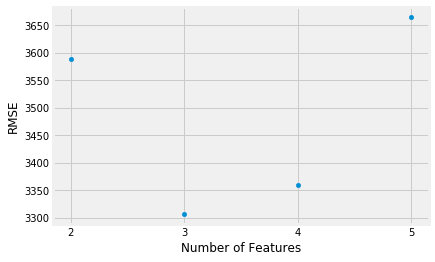

In [25]:
all_dict_df.plot.scatter(x="no_of_features",y="rmse")
plt.xlabel("Number of Features")
plt.ylabel("RMSE")
plt.xticks([2,3,4,5]);

## We see that taking the 3 best features along with 5 nearest neighbors gives the best predictions

In [26]:
all_dict_df.sort_values("rmse")

,no_of_features,rmse
1,3,3305.940140
2,4,3358.691580
0,2,3589.313262
3,5,3665.546673


## Finally, we do a combination of selecting the best n-features for n=[2,5] along with varying the hyperparameter(i.e. nearest neighbor value) between 1 and 25

In [27]:
def knn_train_test_hyper_params(train_columns,target_column,df):
    np.random.seed(1)
        
    #We shuffle the dataframe
    new_df = df.iloc[np.random.permutation(len(df))]
    
    # Split dataframe into training and testing set
    train_set = new_df.iloc[0:int(len(new_df) * .5)]
    test_set = new_df.iloc[int(len(new_df) *.5):]
    
    rmse_dict = dict()
    for k in np.arange(1,26):
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(train_set[train_columns],train_set[[target_column]])
        prediction = knn.predict(test_set[train_columns])
        mse = mean_squared_error(test_set[[target_column]],prediction)
        rmse = np.sqrt(mse)
        rmse_dict[k]= rmse
    return rmse_dict

In [28]:
hyper_param_dict = dict()
for i in [2,3,4,5]:
    features = feature[:i]
    hyper_param_dict["{} features".format(i)] = knn_train_test_hyper_params(
    features,"price",cars)

In [29]:
hyper_param_dict

{'2 features': {1: 4061.9613050304106,
  2: 3497.49936199118,
  3: 3402.8692636542114,
  4: 3587.0044198356923,
  5: 3589.3132622073304,
  6: 3680.062981095498,
  7: 3756.92796407086,
  8: 3937.770418264052,
  9: 4078.3485919700097,
  10: 4163.828373808731,
  11: 4297.135962941241,
  12: 4370.753019740529,
  13: 4500.462028689254,
  14: 4604.156707686779,
  15: 4595.345097101211,
  16: 4605.433669910023,
  17: 4611.2845838376215,
  18: 4598.88218482117,
  19: 4579.964891966457,
  20: 4653.966845712387,
  21: 4759.076059393234,
  22: 4807.805949321809,
  23: 4865.320887129985,
  24: 4910.715769042787,
  25: 4921.936353813013},
 '3 features': {1: 3013.0109985241875,
  2: 2813.285969825997,
  3: 3171.585284478674,
  4: 3182.3137417981943,
  5: 3305.9401397969677,
  6: 3522.506848900376,
  7: 3774.3772094554106,
  8: 3978.969124021116,
  9: 3992.923680588881,
  10: 4076.2381473803043,
  11: 4156.388331131807,
  12: 4201.10713385948,
  13: 4303.62676861325,
  14: 4359.693296989702,
  15: 43

## Below, we show plots for all hyperparameter values and combination of 2,3,4 and 5 features

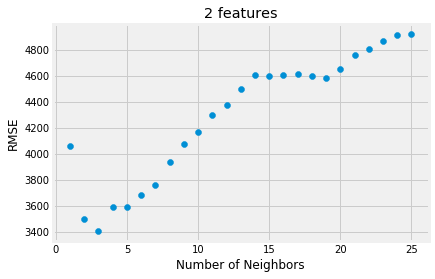

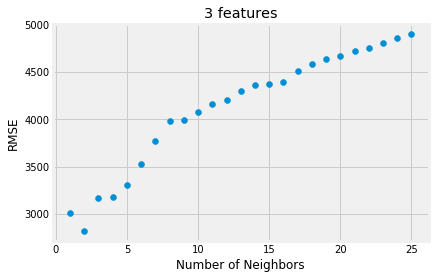

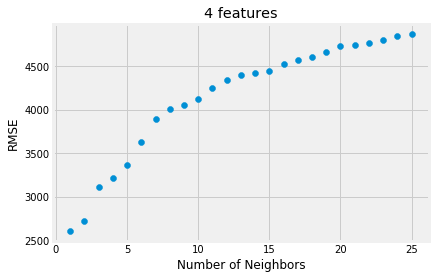

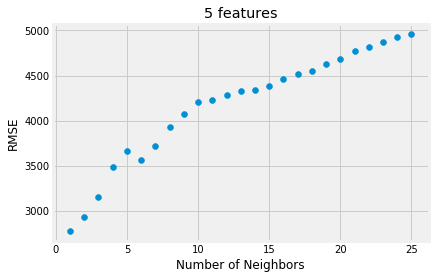

In [30]:
fig,ax = plt.subplots()
i = 1
for k,v in hyper_param_dict.items():
    x = list(v.keys())
    y = list(v.values())
    #ax = fig.add_subplot(4,1,i)
    plt.scatter(x,y)
    plt.xlabel("Number of Neighbors")
    plt.ylabel("RMSE")
    plt.title(k)
    plt.show()
    i+1

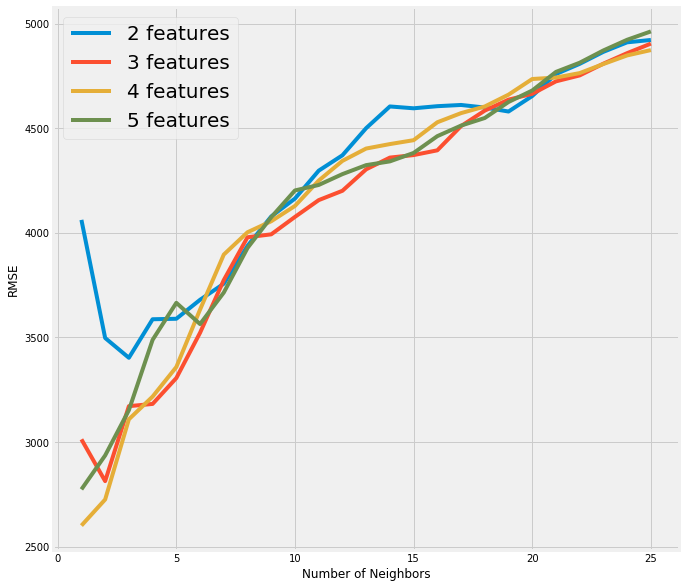

In [31]:
fig,ax = plt.subplots(figsize=(10,10))
for k,v in hyper_param_dict.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y,label=k)
    plt.xlabel('Number of Neighbors')
    plt.ylabel('RMSE')
    plt.legend(loc="upper left",fontsize=20)

## It is interesting to observe that a number of neighbors value of less than 5 seems to be optimal for all our models. In fact 3 of the 4 models have k=2 as their optimal values and one other has k=3

## Next we repeat the tests above but this time using the k-folds validation

## We do the following KFolds Cross Validations:
<ol>
    <li>We compare the initial train/test validation with KFold validation
        with 2 folds and 5 folds</li>
    <li>We test each feature with the default number of neighbors</li>
    <li>We test each feature while varying the number of neighbors</li>
    <li>We test the best n-features at a time for default number of
        neighbors</li>
    <li>We repeat the previous analysis while varying the number of
        neighbors</li>
</ol>

In [32]:
def kfolds_onefeature_5_neighbors(train_column,test_column,n_splits,df):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mses = (((cross_val_score(knn,df[[train_column]],
                              df[[test_column]],
                              scoring="neg_mean_squared_error",cv=kf))))
    rmses = np.sqrt(np.abs(mses))
    avg_rmses = np.mean(rmses)
    return avg_rmses

In [33]:
onefeature_5_neighbors_2_split = dict()
for column in cars.columns[:-1]:
    onefeature_5_neighbors_2_split[column] = kfolds_onefeature_5_neighbors(
                                            column,"price",2,cars)

In [34]:
onefeature_5_neighbors_2_split_series = (((pd.Series(
                                onefeature_5_neighbors_2_split).sort_values())))

In [35]:
onefeature_5_neighbors_2_split_series

horsepower           3983.289877
curb-weight          4130.915690
highway-mpg          4336.427993
width                4480.755962
city-mpg             4788.022045
length               5645.803155
wheel-base           5709.567683
bore                 6561.161516
compression-rate     6875.609561
normalized-losses    7482.632289
peak-rpm             7721.986452
height               7735.811797
stroke               7768.258096
dtype: float64

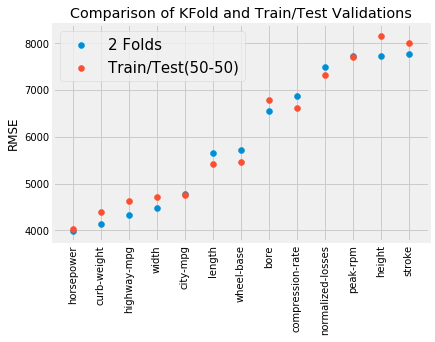

In [36]:
## First, we rearrange the index of the rmse_values_series
rmse_values_series = (((rmse_values_series.sort_values().
                        iloc[[0,1,2,3,4,5,6,8,7,9,10,12,11]])))
plt.scatter(np.arange(len(onefeature_5_neighbors_2_split_series)),
           onefeature_5_neighbors_2_split_series,label="2 Folds")
plt.scatter(np.arange(len(rmse_values_series)),
           rmse_values_series,label="Train/Test(50-50)")
plt.xticks(range(13),rmse_values_series.index,rotation=90)
plt.ylabel("RMSE")
plt.title("Comparison of KFold and Train/Test Validations")
plt.legend(fontsize=15)
plt.show()

## We see that the simple train/test validation has very similar results compared to the KFold validation for 2 folds

## Next we explore the case for 5 folds

In [37]:
onefeature_5_neighbors_5_split = dict()
for column in cars.columns[:-1]:
    onefeature_5_neighbors_5_split[column] = kfolds_onefeature_5_neighbors(
                                            column,"price",5,cars)

In [38]:
rmse_values_series

horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
bore                 6780.627785
compression-rate     6610.812153
normalized-losses    7330.197653
peak-rpm             7697.459696
height               8144.441043
stroke               8006.529545
dtype: float64

In [39]:
onefeature_5_neighbors_5_split_series = (((pd.Series
                                (onefeature_5_neighbors_5_split).
                                sort_values().
                                        iloc[[0,3,1,2,4,5,6,8,7,10,11,12,9]])))

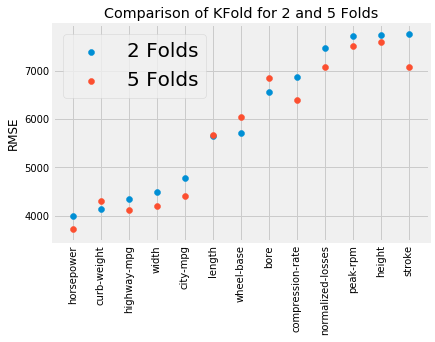

In [40]:
plt.scatter(np.arange(len(onefeature_5_neighbors_2_split_series)),
           onefeature_5_neighbors_2_split_series,label="2 Folds")
plt.scatter(np.arange(len(onefeature_5_neighbors_5_split_series)),
           onefeature_5_neighbors_5_split_series,label="5 Folds")

plt.xticks(range(13),rmse_values_series.index,rotation=90)
plt.ylabel("RMSE")
plt.title("Comparison of KFold for 2 and 5 Folds")
plt.legend(fontsize=20)
plt.show()

## We see that the case of 5 folds produces much more accurate predictions than 2 folds.

## Let us now focus on 5 folds and vary the hyperparamater k for k in [1,3,5,7,9]

In [41]:
def kfolds_onefeature_varying_neighbors(train_column,test_column,df):
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    k = [1,3,5,7,9]
    k_dict = dict()
    for k in k:
        knn = KNeighborsRegressor(n_neighbors=k)
        mses = (((cross_val_score(knn,df[[train_column]],
                              df[[test_column]],
                              scoring="neg_mean_squared_error",cv=kf))))
        rmses = np.sqrt(np.abs(mses))
        avg_rmses = np.mean(rmses)
        k_dict[k] = avg_rmses
    return k_dict

In [42]:
onefeature_varying_neighbors_5_splits = dict()
for column in cars.columns[:-1]:
    onefeature_varying_neighbors_5_splits[column] = (((
        kfolds_onefeature_varying_neighbors(column,"price",cars))))

In [43]:
onefeature_varying_neighbors_5_splits

{'normalized-losses': {1: 8739.121756745079,
  3: 6951.353120455105,
  5: 7088.257745197118,
  7: 7564.31221647824,
  9: 7721.082283472022},
 'wheel-base': {1: 4243.639928884716,
  3: 5071.662902314459,
  5: 6047.925792509784,
  7: 6139.038807530529,
  9: 6182.245736470325},
 'length': {1: 4881.922536998683,
  3: 5539.008388568261,
  5: 5674.682462899403,
  7: 5565.790385114858,
  9: 5603.09769224301},
 'width': {1: 5110.308191770663,
  3: 4067.5747440647256,
  5: 4198.202899280919,
  7: 4332.322467829546,
  9: 4348.190417230873},
 'height': {1: 9267.972331603416,
  3: 7577.75231284287,
  5: 7602.563324187031,
  7: 7550.773416526457,
  9: 7595.696899292711},
 'curb-weight': {1: 5270.163313342174,
  3: 4564.018414781373,
  5: 4310.7102771908085,
  7: 4047.144857129527,
  9: 3947.7430285593655},
 'bore': {1: 8704.760007703995,
  3: 6631.371348737125,
  5: 6840.959167522199,
  7: 6848.317962683868,
  9: 6593.84093897876},
 'stroke': {1: 8229.487873859067,
  3: 7170.581358116106,
  5: 7077

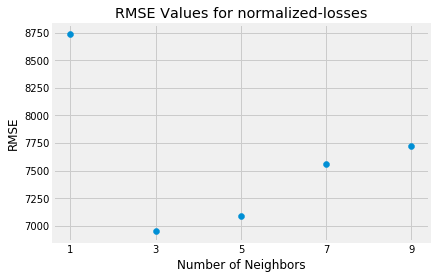

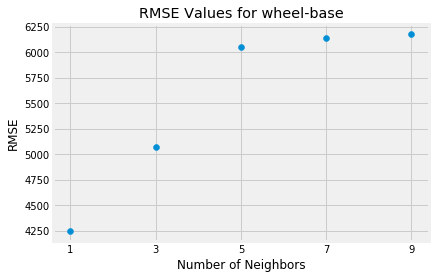

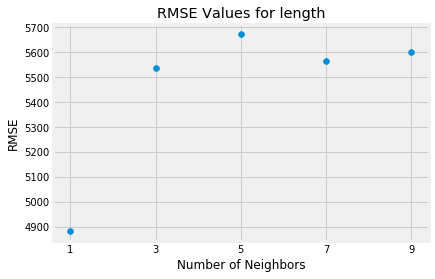

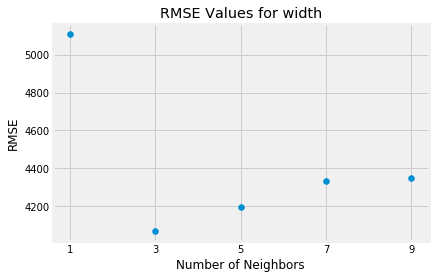

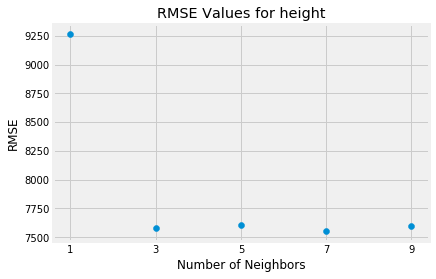

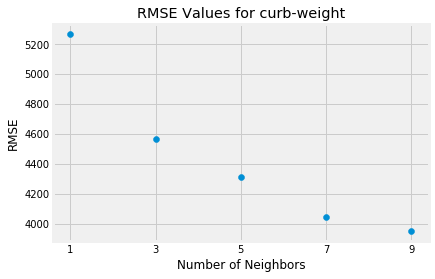

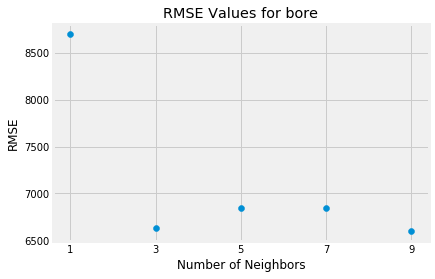

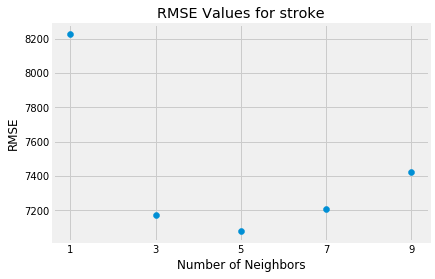

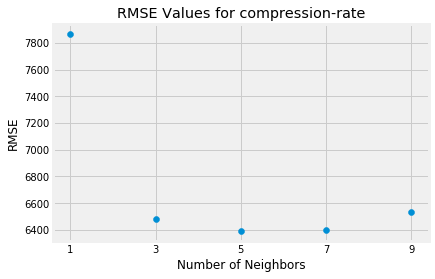

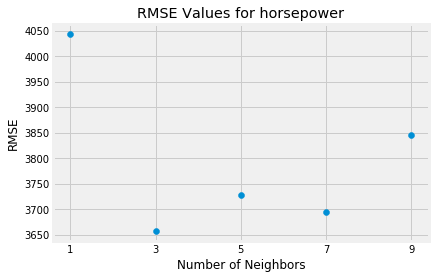

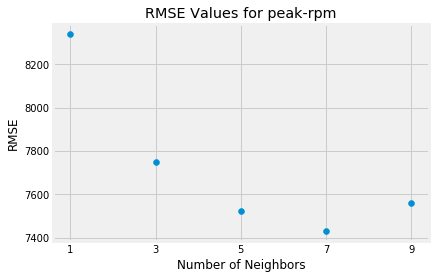

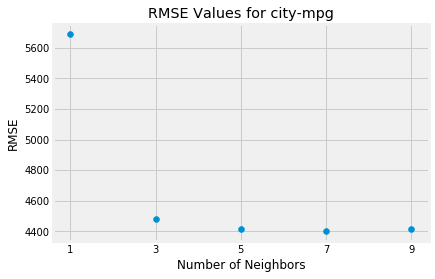

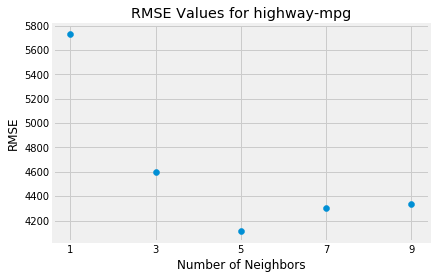

In [44]:
fig,ax = plt.subplots()
i = 1
for k,v in onefeature_varying_neighbors_5_splits.items():
    x = list(v.keys())
    y = list(v.values())
    #ax = fig.add_subplot(13,1,i)
    plt.scatter(x,y)
    plt.title("RMSE Values for {}".format(k))
    plt.xticks(x)
    plt.xlabel("Number of Neighbors")
    plt.ylabel("RMSE")
    i += 1
    plt.show()

## Let's find the average RMSE value for each feature and rank features from lowest to highest

In [45]:
new_dict = dict()
for k,v in onefeature_varying_neighbors_5_splits.items():
    avg_rmse = np.mean(list(v.values()))
    new_dict[k] = avg_rmse
new_dict_series = pd.Series(new_dict).sort_values()
print(new_dict_series)
all_features = new_dict_series.index
all_features

horsepower           3793.546776
width                4411.319744
curb-weight          4427.955978
highway-mpg          4616.738223
city-mpg             4679.139117
length               5452.900293
wheel-base           5536.902634
compression-rate     6733.555237
bore                 7123.849885
stroke               7423.013820
normalized-losses    7612.825424
peak-rpm             7720.417907
height               7918.951657
dtype: float64


Index(['horsepower', 'width', 'curb-weight', 'highway-mpg', 'city-mpg',
       'length', 'wheel-base', 'compression-rate', 'bore', 'stroke',
       'normalized-losses', 'peak-rpm', 'height'],
      dtype='object')

## The image below shows the features ranked by lowest RMSE from our initial train/test validation. Compared with the listing above for 5-fold cross validation, we see that regardless of our validation technique, the best 4 features are the same

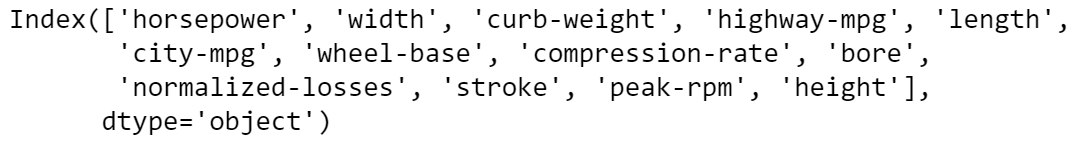

## Next we will select the best n-features for n in [2,5] as well as using the default 5 neighbors and observe the behavior of the RMSE

In [46]:
def kfolds_multifeature_5_neighbors(train_column,test_column,df):
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    knn = KNeighborsRegressor()
    mses = (((cross_val_score(knn,df[train_column],
                              df[[test_column]],
                              scoring="neg_mean_squared_error",cv=kf))))
    rmses = np.sqrt(np.abs(mses))
    avg_rmses = np.mean(rmses)
    return avg_rmses

In [47]:
kfolds_multifeature_5_neighbors_dict = dict()
for i in range(2,6):
    feature = all_features[:i]
    kfolds_multifeature_5_neighbors_dict["{} best features".format(i)] = (((
    kfolds_multifeature_5_neighbors(feature,"price",cars)))) 

In [48]:
kfolds_multifeature_5_neighbors_dict

{'2 best features': 3327.0095335604806,
 '3 best features': 3027.7487021204315,
 '4 best features': 2920.6998763538077,
 '5 best features': 3006.2972584279896}

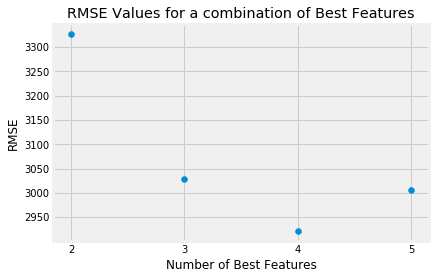

In [49]:
plt.scatter(x=range(4),y=list(kfolds_multifeature_5_neighbors_dict.values()))
plt.xticks(range(4),range(2,6))
plt.xlabel("Number of Best Features")
plt.ylabel("RMSE")
plt.title("RMSE Values for a combination of Best Features");

## We see that a combination of the 4 best features leads to best model accuracy in the case of 5 nearest neighbors

## Finally, let us explore the effects of combining n-best features along with variations of the hyperparameter(i.e number of nearest neighbors. We will vary the hyperparameter from 1 to 25

In [50]:
def kfolds_multifeature_varying_neighbors(train_column,test_column,df):
    kf = KFold(n_splits=5, shuffle=True, random_state=1)
    k_dict = dict()
    for k in range(1,26):
        knn = KNeighborsRegressor(n_neighbors=k)
        mses = (((cross_val_score(knn,df[train_column],
                              df[[test_column]],
                              scoring="neg_mean_squared_error",cv=kf))))
        rmses = np.sqrt(np.abs(mses))
        avg_rmses = np.mean(rmses)
        k_dict[k] = avg_rmses
    return k_dict

In [51]:
kfolds_multifeature_varying_neighbors_dict = dict()
for i in range(2,6):
    feature = all_features[:i]
    kfolds_multifeature_varying_neighbors_dict["{} best features".format(i)] = \
            kfolds_multifeature_varying_neighbors(feature,"price",cars)

In [52]:
kfolds_multifeature_varying_neighbors_dict

{'2 best features': {1: 4204.232910362621,
  2: 3419.7587425557986,
  3: 3179.341929849026,
  4: 3290.0207654895216,
  5: 3327.0095335604806,
  6: 3415.820882324205,
  7: 3501.424596914505,
  8: 3616.052139018856,
  9: 3721.7713100944247,
  10: 3807.889714007516,
  11: 3791.4311477265533,
  12: 3778.946331433547,
  13: 3822.5468630684504,
  14: 3900.09795684177,
  15: 3942.617673975338,
  16: 4024.0213768095186,
  17: 4096.84682051445,
  18: 4160.428991095495,
  19: 4202.498942068493,
  20: 4243.217016761454,
  21: 4259.250863428484,
  22: 4306.052580520992,
  23: 4359.455859022463,
  24: 4387.657740032175,
  25: 4408.535760644692},
 '3 best features': {1: 2616.9341194049052,
  2: 2768.8623720404635,
  3: 2824.649757855767,
  4: 2924.9413222361736,
  5: 3027.7487021204315,
  6: 3050.464158146594,
  7: 3153.3850437931687,
  8: 3223.5589116353012,
  9: 3296.746461466885,
  10: 3336.0042511609463,
  11: 3383.3238906833767,
  12: 3507.621116292564,
  13: 3630.8020663646503,
  14: 3740.6309

## Finally, we plot the variations of RMSE for all 25 hyperparameter values and 2,3,4 and 5 best features

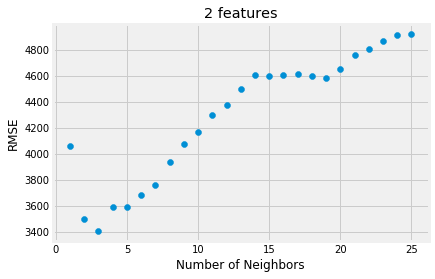

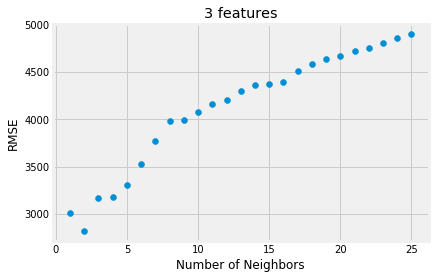

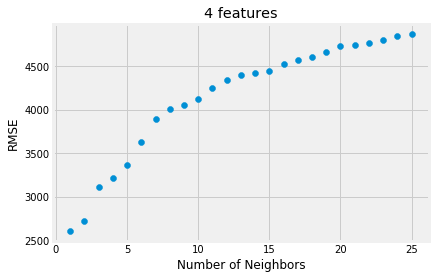

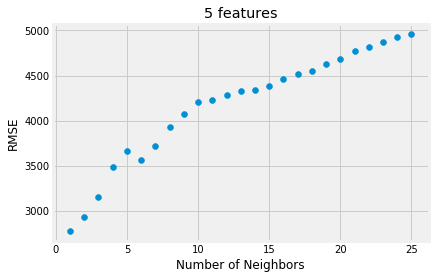

In [53]:
fig, ax = plt.subplots()
i = 1
for k,v in hyper_param_dict.items():
    x = list(v.keys())
    y = list(v.values())
    #ax = fig.add_subplot(4,1,i)
    plt.scatter(x,y)
    plt.xlabel("Number of Neighbors")
    plt.ylabel("RMSE")
    plt.title(k)
    plt.show()
    i+1

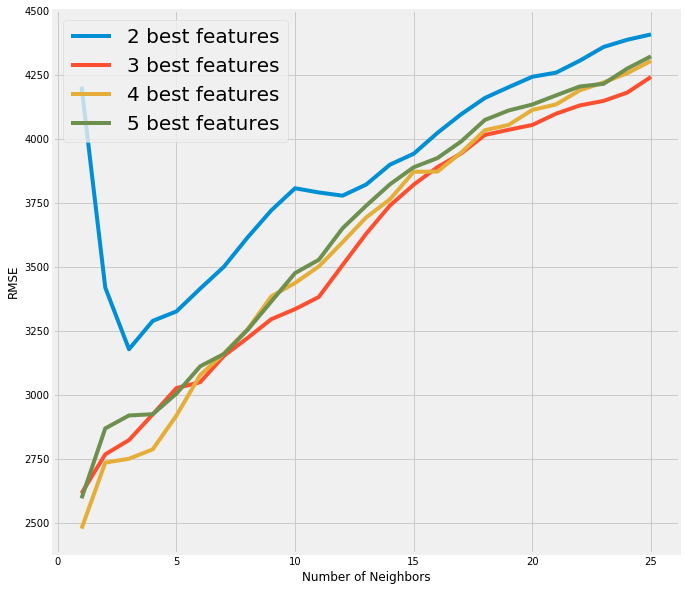

In [54]:
fig,ax = plt.subplots(figsize=(10,10))
for k,v in kfolds_multifeature_varying_neighbors_dict.items():
    x = list(v.keys())
    y = list(v.values())
    plt.plot(x,y,label=k)
    plt.xlabel('Number of Neighbors')
    plt.ylabel('RMSE')
    plt.legend(loc="upper left",fontsize=20)

## Conclusions:

<ol>
    <li> Use of 5 or fewer nearest neighbors provides optimal values for predictions</li>
    <li> K-Fold Validation leads to higher accuracy than a simple train/test
        validation</li>
    <li> Selecting the 3 or 4 best features is the optimal choice for
        predictions</li>
    <li> The 3 best features are:
        <ol>
            <li>Horsepower</li>
            <li>Width</li>
            <li>curbweight</li>
        </ol>
        The 3 worst features are:
        <ol>
            <li>normalized_losses</li>
            <li>peak_rpm</li>
            <li>height</li>
        </ol>
    </li>
</ol>